---

# Regressão Linear

#### Grupo: Isadora Dalberto, Lais da Silva, Gabriela Moreno e Stephanie Liu

---

## Base Teste

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [48]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

## Treinamento

In [4]:
# --------------- Importando biblotecas ---------------
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [5]:
# --------------- Leitura dos dados ---------------
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [6]:
# --------------- Colocando Indice ---------------
dados_indice = dados.set_index("Country")

In [7]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [50]:
# --------------- DEF para acuracia --------------- 
def Erro(y_previsto,y_base_teste):
    lista_erro = []
    for i,e in zip(y_previsto,y_base_teste):
        if i < e:
            dif = e-i
            lista_erro.append(dif)
        else: 
            dif = i-e
            lista_erro.append(dif)
    return lista_erro

def Classificador(lista_erro):
    lista_classificacao = []
    for erros in lista_erro:
        if erros<0.5:
            classifica = 'Certo'
            lista_classificacao.append(classifica)
        else:
            classifica = 'Errado'
            lista_classificacao.append(classifica)
    return lista_classificacao 

def Acuracia(Classificador,Erro,y_predict,y_test):
    data = {
    'Y_predict': y_predict,
    'Y_test': y_test,
    'Erro': Erro, 
    'Classificação': Classificador,
    }
    tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
    tabela.head(5)
    contador=0
    for c in Classificador: 
        if c == "Certo": 
            contador+=1
    acertou=(contador/len(Classificador))*100
    return acertou 

In [8]:
dados_indice.columns

Index(['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita',
       'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita'],
      dtype='object')

### Usando as variáveis quantitativas 
HappinessScore, HDI, GDP_PerCapita, Beer_PerCapita, Spirit_PerCapita, Wine_PerCapita

In [9]:
df = dados_indice[['HappinessScore', 'HDI','GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita']]

### Variável Dependente e Independente 

* **Dependente(Y):**
Indice de Felicidade (HappinessScore) como resposta (dependente).

* **Independente(X):**
Demais variáveis como explicativas.

## Primeira regressão
* **Variável Independente(X)=** 
todas as variáveis quantitativas

In [10]:
Y = df['HappinessScore']

In [111]:
X = df[['HDI','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']]

In [12]:
results = regress(X,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           7.05e-27
Time:                        08:18:55   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461      1.063      0.290      -0.423       1.403
HDI                  0.0069      0.001     10.196      0.000       0.006       0.008
GDP_PerCapita        0.0002      0.000      0.672      0.503      -0.000       0.001
Beer_PerCapita       0.0007      0.001      0.912      0.363      -0.001       0.002
Spirit_PerCapita    -0.0014      0.001     -1.655      0.101      -0.003       0.000
Wine_PerCapita      -0.0014      0.001     -1.471      0.144      -0.003       0.000
==============================================================================
Omnibus:                        5.197   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.098
Skew:                          -0.185   Prob(JB):                        0.212
Kurtosis:                       2.312   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((109, 5), (109,), (13, 5), (13,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [16]:
y_predict = model.predict(X_test)
y_predict

array([6.43615858, 5.39968522, 5.60648067, 3.44764204, 6.72982633,
       5.0738702 , 5.9324452 , 3.42529359, 5.22831834, 6.53821721,
       6.18927254, 4.2073435 , 6.63512471])

In [78]:
lista_erro = Erro(y_predict,y_test)
lista_classificação = Classificador(lista_erro)
resultado = Acuracia(lista_classificação,lista_erro,y_predict,y_test)
print("A regressão Linear acertou {0}%".format(resultado))

A regressão Linear acertou 30.76923076923077%


### Conclusão Primeira regressão
É possivel observar que os valores P (P>|t|) das variáveis GDP_PerCapita e Beer_PerCapita são os maiores, o que nos informa que a probabilidade dessa variável regressora ser relevante para explicar a variavel dependente (Hapiness) é baixa, pois o valor "p" é alto. 

## Segunda regressão
* **Variável Independente(X)=** 
Hdi, Spirit_Percapita e Wine_Percapita

In [21]:
X1 = df[['HDI','Spirit_PerCapita','Wine_PerCapita']]

In [22]:
results = regress(X1,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     81.08
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.54e-28
Time:                        08:21:46   Log-Likelihood:                -121.28
No. Observations:                 122   AIC:                             250.6
Df Residuals:                     118   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6147      0.357      1.722      0.088      -0.092       1.321
HDI                  0.0069      0.001     12.442      0.000       0.006       0.008
Spirit_PerCapita    -0.0012      0.001     -1.505      0.135      -0.003       0.000
Wine_PerCapita      -0.0010      0.001     -1.197      0.234      -0.003       0.001
==============================================================================
Omnibus:                        5.276   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.230
Skew:                          -0.205   Prob(JB):                        0.199
Kurtosis:                       2.317   Cond. No.                     4.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.1, random_state=RANDOM_SEED)

In [24]:
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((109, 3), (109,), (13, 3), (13,))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train1,y_train1)

In [32]:
y_predict1 = model.predict(X_test1)
y_predict1

array([6.41913177, 5.27279956, 5.65417   , 3.40213554, 6.63839292,
       5.1460217 , 5.83289866, 3.41783891, 5.29833188, 6.4892228 ,
       6.03239747, 4.08473248, 6.69993347])

In [77]:
lista_erro1 = Erro(y_predict1,y_test1)
lista_classificação1 = Classificador(lista_erro1)
resultado1 = Acuracia(lista_classificação1,lista_erro1,y_predict1,y_test1)
print("A regressão Linear acertou {0}%".format(resultado1))

A regressão Linear acertou 30.76923076923077%


### Conclusão Segunda regressão
Ao retirar as variáveis que possuiam o valor P mais alto, foi possível observar que a o valor de R ao quadrado não houve quase mudança e que o valor de P das variáveis Spirit_PerCapita e Wine_PerCapita ainda estão altos compraradas com o valor de 5%. Além disso, o poder preditivo não foi alterado. 

Assim, para uma melhora dessa regressão seria retirar as variáveis com valor P maior que 5% e observar a consequência disso no valor de R ao quadrado.

## Terceira regressão
* **Variável Independente(X)=** 
Hdi

In [38]:
X2 = df[['HDI']]


In [39]:
results = regress(X2,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     237.7
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.10e-30
Time:                        08:26:50   Log-Likelihood:                -122.91
No. Observations:                 122   AIC:                             249.8
Df Residuals:                     120   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8950      0.306      2.921      0.004       0.288       1.502
HDI            0.0062      0.000     15.416      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.572
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       2.479   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.1, random_state=RANDOM_SEED)

In [41]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((109, 1), (109,), (13, 1), (13,))

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train2,y_train2)

In [43]:
y_predict2 = model.predict(X_test2)
y_predict2

array([6.52638981, 5.29198389, 5.84904913, 3.41821901, 6.61501383,
       5.10207529, 5.912352  , 3.94363281, 5.53886508, 6.46308694,
       6.21620576, 4.0449174 , 6.51372924])

In [76]:
lista_erro2 = Erro(y_predict2,y_test2)
lista_classificação2 = Classificador(lista_erro2)
resultado2 = Acuracia(lista_classificação2,lista_erro2,y_predict2,y_test2)
print("A regressão Linear acertou {0}%".format(resultado2))

A regressão Linear acertou 38.46153846153847%


### Conclusão Terceira regressão
Ao deixar somente o HDI como variável independente, ou seja, sem nenhuma variável relacionada a álcool o valor do r ao quadrado não foi muito alterado, e o valor preditivo possuiu uma taxa de acerto aproximadamente 8% maior. Assim, é possível concluir, a partir desses regressões, que as variáveis relacionadas ao consumo de álcool não possuem relação com o índice de felicidade.


# Interpretação dos dados
Ao tentar melhorar o desempenho da regressão foi retirado as variáveis com valor de P maiores, depois as variáveis com valor de P maior que 5% e foi possível observar que todas as variáveis que tinham ligação com o álcool foram retiradas, e que o valor de R ao quadrado não obteve uma grande mudança. 

O intuito de retriar as variávei com valor de P altos é devido o fato de quando o valor de P é baixo, quer dizer que a variável regressora é relevante para explicar a variável dependente. Assim, valores de P alto são mais irrelevantes na regressão, o que faz com que o valor de R ao quadrado não mude tanto ao retirar tais variáveis.

Assim, é possível concluir que as variáveis que estão relacionadas com o consumo de álcool foram retiradas da regressão e o valor de R ao quadrado possuiu uma pequena alteração. Desta forma, é possivél concluir que o álcool não possui relação com a felicidade e que a variável HDI é a que possui uma maior influência no índice de felicidade.


# Adicionando Variáveis 

O intuito de adicionar mais variáveis é observar quais seriam outras possiveis variáveis que podem ajudar na regressão e ajudar a determinar o valor preditivo.

In [66]:
dados_completo = pd.read_excel("DadosTodasAsVariaveis.xlsx")

### Todas as Variáveis ( iteração 1)

In [112]:
X3 = dados_completo[['HDI','GDP_PerCapita','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita', 'Mortalidade', 'Inflação', 'Criança p/ Mulher', 'Expec de Vida','Desemprego']]

In [113]:
Y = dados_completo['HappinessScore']

In [114]:
results = regress(X3,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     20.08
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.11e-16
Time:                        08:59:52   Log-Likelihood:                -57.635
No. Observations:                  77   AIC:                             137.3
Df Residuals:                      66   BIC:                             163.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.5898      2.732     -1.680      0.098     -10.044       0.864
HDI                   0.0059      0.002      3.838      0.000       0.003       0.009
GDP_PerCapita     -1.787e-06      0.001     -0.002      0.999      -0.002       0.002
Beer_PerCapita        0.0017      0.001      2.252      0.028       0.000       0.003
Spirit_PerCapita     -0.0021      0.001     -1.678      0.098      -0.005       0.000
Wine_PerCapita       -0.0016      0.001     -1.820      0.073      -0.003       0.000
Mortalidade          -0.0007      0.013     -0.056      0.955      -0.027       0.026
Inflação              0.0251      0.019      1.290      0.202      -0.014       0.064
Criança p/ Mulher     0.3133      0.183      1.716      0.091      -0.051       0.678
Expec de Vida         0.0727      0.037      1.989      0.051      -0.000       0.146
Desemprego           -0.0483      0.012     -3.994      0.000      -0.072      -0.024
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.107
Skew:                           0.079   Prob(JB):                        0.948
Kurtosis:                       2.908   Cond. No.                     3.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y, test_size=0.1, random_state=RANDOM_SEED)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train3,y_train3)

In [73]:
y_predict3 = model.predict(X_test3)
y_predict3

array([6.90058192, 6.19204721, 7.28279929, 6.69497735, 5.76556343,
       5.84046465, 5.29223884, 5.9869855 ])

In [75]:
lista_erro3 = Erro(y_predict3, y_test3)
lista_classificação3 = Classificador(lista_erro3)
resultado3 = Acuracia(lista_classificação3,lista_erro3,y_predict3,y_test3)
print("A regressão Linear acertou {0}%".format(resultado3))

A regressão Linear acertou 50.0%


#### Conclusão 1

Ao adicionar mais variáveis, sem retirar nenhuma das que já haviam sido analisadas, foi possivel observar um aumento na porcentagem de acerto e um aumento no valor do r ao quadrado. 

Além disso, é possivel observar que o valor de P para a variável "Beer_PerCapita" está baixo, o que difere da analise anterior. Uma possível explicação para esse fato é que os dados não possuem uma distribuição normal, o que dificulta a interpretação dos dados.

Adeais, com intuito de melhorar a regressão o próximo passo seria retirar mais variáveis com valor P alto (iteração 2). 

### IDH + Cerveja + Expectativa de vida + Desemprego (iteração 2)

In [99]:
X4 = dados_completo[['HDI','Beer_PerCapita','Expec de Vida','Desemprego']]

In [100]:
results = regress(X4,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     40.16
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.19e-17
Time:                        08:53:20   Log-Likelihood:                -66.258
No. Observations:                  77   AIC:                             142.5
Df Residuals:                      72   BIC:                             154.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6282      1.291     -1.261      0.211      -4.202       0.945
HDI                0.0036      0.001      2.506      0.014       0.001       0.006
Beer_PerCapita     0.0011      0.001      1.405      0.164      -0.000       0.003
Expec de Vida      0.0646      0.028      2.298      0.024       0.009       0.121
Desemprego        -0.0555      0.012     -4.638      0.000      -0.079      -0.032
==============================================================================
Omnibus:                        2.773   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.328
Skew:                          -0.424   Prob(JB):                        0.312
Kurtosis:                       3.070   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y, test_size=0.1, random_state=RANDOM_SEED)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train4,y_train4)

In [103]:
y_predict4 = model.predict(X_test4)
y_predict4

array([6.70480731, 5.9975026 , 6.63792174, 6.77119548, 6.00805442,
       6.1268558 , 5.44477454, 5.46023693])

In [104]:
lista_erro4 = Erro(y_predict4, y_test4)
lista_classificação4 = Classificador(lista_erro4)
resultado4 = Acuracia(lista_classificação4,lista_erro4,y_predict4,y_test4)
print("A regressão Linear acertou {0}%".format(resultado4))

A regressão Linear acertou 37.5%


#### Conclusão 2

A partir da regressão realizada na iteração 2 foi possível observar uma piora do valor preditivo e no valor do r ao quadrado em relação a iteração 1. O que confirma a dificuldade em interpretar os dados, como apresentado anteriormente.

Somado a isso, o valor P da variável "Beer_PerCapita" aumentou novamente, o que nos levou a retirar a variavel na iteração 3.

### IDH + Expectativa de Vida + Desemprego (iteração 3)

In [105]:
X5 = dados_completo[['HDI','Expec de Vida','Desemprego']]

In [106]:
results = regress(X5,Y)
results.summary()

C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     52.19
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.94e-18
Time:                        08:54:00   Log-Likelihood:                -67.300
No. Observations:                  77   AIC:                             142.6
Df Residuals:                      73   BIC:                             152.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2643      1.273     -0.993      0.324      -3.802       1.273
HDI               0.0046      0.001      3.720      0.000       0.002       0.007
Expec de Vida     0.0515      0.027      1.928      0.058      -0.002       0.105
Desemprego       -0.0541      0.012     -4.509      0.000      -0.078      -0.030
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.230
Skew:                          -0.310   Prob(JB):                        0.541
Kurtosis:                       2.998   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y, test_size=0.1, random_state=RANDOM_SEED)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train5,y_train5)

In [109]:
y_predict5 = model.predict(X_test5)
y_predict5

array([6.64061113, 5.91734116, 6.79412539, 6.77658732, 5.93836734,
       5.98379337, 5.51178613, 5.65146513])

In [116]:
lista_erro5 = Erro(y_predict5, y_test5)
lista_classificação5 = Classificador(lista_erro5)
resultado5 = Acuracia(lista_classificação5,lista_erro5,y_predict5,y_test5)
print("A regressão Linear acertou {0}%".format(resultado5))

A regressão Linear acertou 62.5%


#### Conclusão 3

A iteração 3, foi a com melhor valor preditivo apesar de não ser a que possui o valor de R ao quadrado mais alto. Assim, foi possível observar que as variáveis que mais possuem relação com a felicidade são:  IDH, expectativa de vida e Desesmprego. 

# Conclusão

A partir do modelo de regressão linear foi possível obter um acerto de 62.5%. Foi possível obter esse resultado a partir da adição de mais variáveis, retirando as variáveis que possuiam o valor P maior e observando a porcentagem de acerto do valor preditivo e do R ao quadrado. 

Além disso, foi possível observar que nem sempre as regressões com o valor do R ao quadrado maior possuiam uma porcentagem de acerto maior. Porem, a regressão mais adequada seria a com porcentagem de acerto maior. Tal resultado, aconteceu devido a baixa probabilidade dos dados terem uma distribuição normal, tendo assim um comportamento mais anormal.

#### Gráfico de VariáveisXHapiness
A partir dos gráficos a seguir é possível observar a correlação entre cada variável e o índice de felicidade.

Gráfico 1


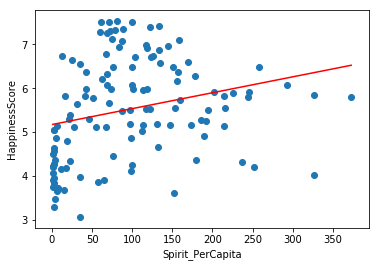

Gráfico 2


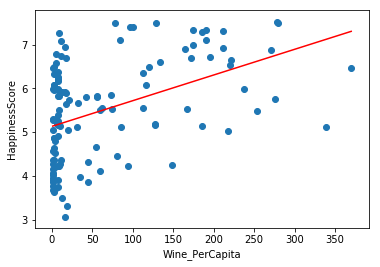

Gráfico 3


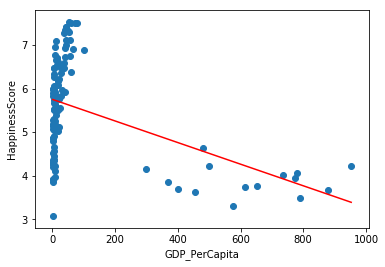

Gráfico 4


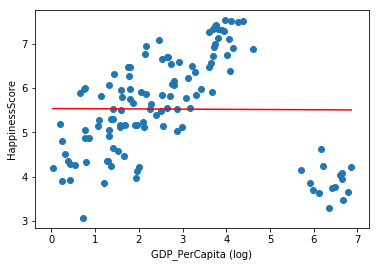

Gráfico 5


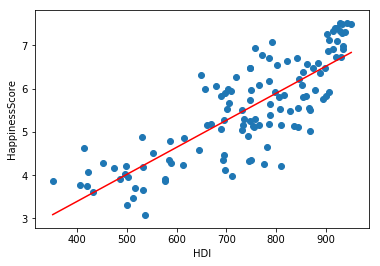

Gráfico 6


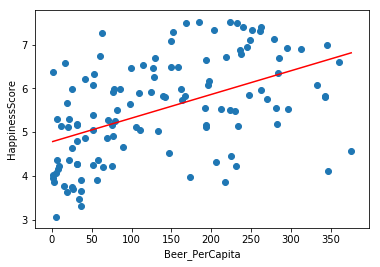

Gráfico 7


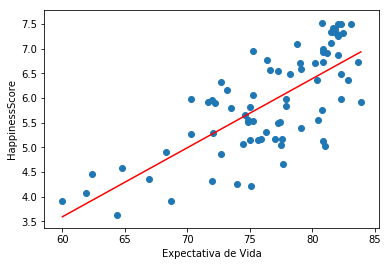

Gráfico 8


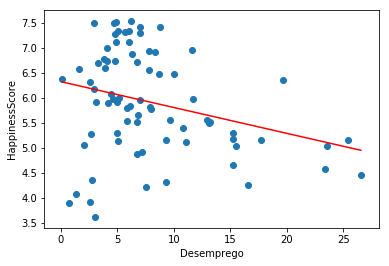

Gráfico 9


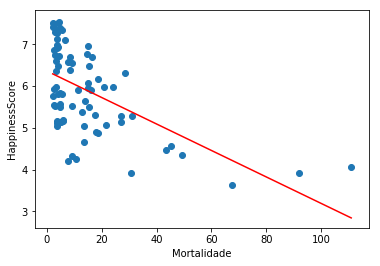

Gráfico 10


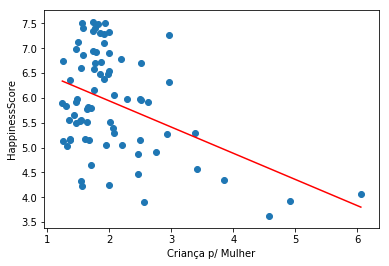

Gráfico 11


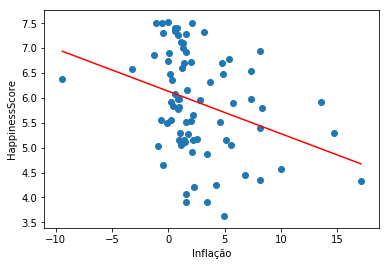

In [124]:
print("Gráfico 1")
y = df['HappinessScore']
x = df['Spirit_PerCapita']   
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Spirit_PerCapita");
plt.show();

print("Gráfico 2")
y = df['HappinessScore'] 
x = df['Wine_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Wine_PerCapita");
plt.show();

print("Gráfico 3")
y = df['HappinessScore']
x = df['GDP_PerCapita']   
# x = np.log(x1)
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("GDP_PerCapita");
plt.show();

print("Gráfico 4")
y = df['HappinessScore']
x1 = df['GDP_PerCapita']   
x = np.log(x1)
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("GDP_PerCapita (log)");
plt.show();

print("Gráfico 5")
y = df['HappinessScore'] 
x = df['HDI'] 
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("HDI");
plt.show();

print("Gráfico 6")
y = df['HappinessScore'] 
x = df['Beer_PerCapita']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Beer_PerCapita");
plt.show();

print("Gráfico 7")
y = dados_completo['HappinessScore'] 
x = dados_completo['Expec de Vida']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Expectativa de Vida");
plt.show();

print("Gráfico 8")
y = dados_completo['HappinessScore'] 
x = dados_completo['Desemprego']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Desemprego");
plt.show();

print("Gráfico 9")
y = dados_completo['HappinessScore'] 
x = dados_completo['Mortalidade']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Mortalidade");
plt.show();

print("Gráfico 10")
y = dados_completo['HappinessScore'] 
x = dados_completo['Criança p/ Mulher']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Criança p/ Mulher");
plt.show();

print("Gráfico 11")
y = dados_completo['HappinessScore'] 
x = dados_completo['Inflação']    
yb = y.mean()
xb = x.mean()
Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()
b1 = Sxy/Sxx
b0 = yb - b1*xb
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.ylabel("HappinessScore");
plt.xlabel("Inflação");
plt.show();

A partir dos gráficos e das análises realizadas é possivel concluir que as variáveis: Expectativa de Vida (gráfico 7), Idh (gráfico 5) e Desemprego (gráfico 8) são as que mais interferem na Felicidade.